In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2010-01-01'
end  = '2019-12-31'

df = data.DataReader('AAPL' , 'yahoo' , start , end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415357
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515211
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526477
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422664
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791


In [6]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
2512,2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.623230
2513,2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.004585
2514,2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,70.977646
2515,2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.398880
2516,2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,71.920570


In [7]:
df = df.reset_index()
print (df)

      index       Date       High        Low       Open      Close  \
0         0 2009-12-31   7.619643   7.520000   7.611786   7.526071   
1         1 2010-01-04   7.660714   7.585000   7.622500   7.643214   
2         2 2010-01-05   7.699643   7.616071   7.664286   7.656429   
3         3 2010-01-06   7.686786   7.526786   7.656429   7.534643   
4         4 2010-01-07   7.571429   7.466071   7.562500   7.520714   
...     ...        ...        ...        ...        ...        ...   
2512   2512 2019-12-24  71.222504  70.730003  71.172501  71.067497   
2513   2513 2019-12-26  72.495003  71.175003  71.205002  72.477501   
2514   2514 2019-12-27  73.492500  72.029999  72.779999  72.449997   
2515   2515 2019-12-30  73.172501  71.305000  72.364998  72.879997   
2516   2516 2019-12-31  73.419998  72.379997  72.482498  73.412498   

           Volume  Adj Close  
0     352410800.0   6.415357  
1     493729600.0   6.515211  
2     601904800.0   6.526477  
3     552160000.0   6.422664  
4   

In [8]:
df = df.drop(['Date','Adj Close'], axis =1)
df.head()

,index,High,Low,Open,Close,Volume
0,0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,4,7.571429,7.466071,7.562500,7.520714,477131200.0


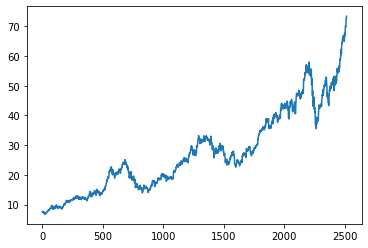

In [9]:
plt.plot(df.Close)

In [10]:
df

,index,High,Low,Open,Close,Volume
0,0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...,...
2512,2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [11]:
ma100 = df.Close.rolling(100).mean()
print(ma100)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64


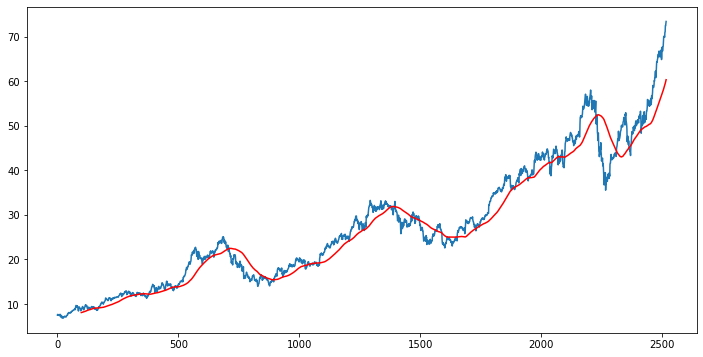

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [13]:
ma200 = df.Close.rolling(200).mean()
print(ma200)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64


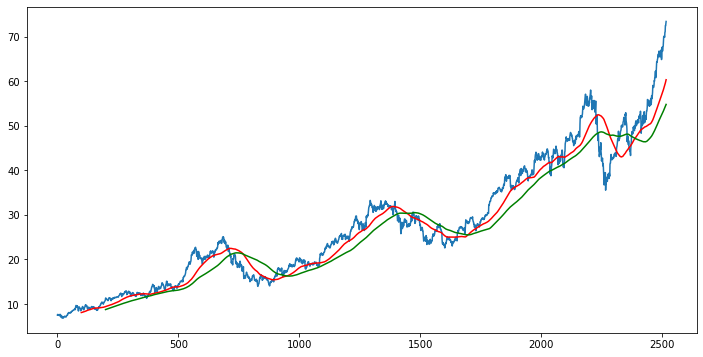

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [15]:
df.shape

(2517, 6)

In [16]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing  = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [17]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [20]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [21]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range = (0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [23]:
x_train = []
y_train = []

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train

[array([[2.52790771e-02],
        [2.97178191e-02],
        [3.02185410e-02],
        [2.56038878e-02],
        [2.50760817e-02],
        [2.69706691e-02],
        [2.44400837e-02],
        [2.12057268e-02],
        [2.51708129e-02],
        [2.35198380e-02],
        [1.87833875e-02],
        [3.11116846e-02],
        [2.66323796e-02],
        [2.16793646e-02],
        [7.71362572e-03],
        [1.49130326e-02],
        [1.87969205e-02],
        [2.14222733e-02],
        [9.79765742e-03],
        [1.35149573e-05],
        [3.62674239e-03],
        [5.15593812e-03],
        [9.71645927e-03],
        [0.00000000e+00],
        [4.61461711e-03],
        [2.80124591e-03],
        [5.60252796e-03],
        [4.15451231e-03],
        [8.95862792e-03],
        [1.12727391e-02],
        [1.53596224e-02],
        [1.42093514e-02],
        [1.47235702e-02],
        [1.30184452e-02],
        [1.13268532e-02],
        [6.77986503e-03],
        [1.16516638e-02],
        [1.34650350e-02],
        [1.7

In [24]:
x_train , y_train = np.array(x_train) , np.array(y_train)

In [25]:
x_train.shape

(1661, 100, 1)

In [36]:
# ml model

In [26]:
from keras.layers import Dense , Dropout , LSTM
from tensorflow.keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True , input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train , y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 35s 437ms/step - loss: 0.0741
Epoch 2/50
52/52 [==============================] - 29s 554ms/step - loss: 0.0159
Epoch 3/50
52/52 [==============================] - 21s 402ms/step - loss: 0.0121
Epoch 4/50
52/52 [==============================] - 22s 425ms/step - loss: 0.0103
Epoch 5/50
52/52 [==============================] - 21s 403ms/step - loss: 0.0098
Epoch 6/50
52/52 [==============================] - 21s 412ms/step - loss: 0.0093
Epoch 7/50
52/52 [==============================] - 21s 408ms/step - loss: 0.0098
Epoch 8/50
52/52 [==============================] - 21s 403ms/step - loss: 0.0085
Epoch 9/50
52/52 [==============================] - 22s 415ms/step - loss: 0.0079
Epoch 10/50
52/52 [==============================] - 22s 414ms/step - loss: 0.0076
Epoch 11/50
52/52 [==============================] - 22s 418ms/step - loss: 0.0081
Epoch 12/50
52/52 [==============================] - 21s 413ms/step - loss: 0.0074
Epoch 13/50
5

In [33]:
model.save('keras_model.h5')

In [34]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [35]:
past_100_days = data_training.tail(100)

In [37]:
final_df = past_100_days.append(data_testing , ignore_index = True)

C:\Users\ashut\AppData\Local\Temp\ipykernel_8648\3207694217.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing , ignore_index = True)


In [38]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [39]:
input_data = scaler.fit_transform(final_df)
print(input_data)

[[0.0275037 ]
 [0.02981315]
 [0.02556164]
 [0.02519422]
 [0.02650642]
 [0.03332987]
 [0.03280496]
 [0.03196517]
 [0.03123034]
 [0.0327    ]
 [0.02823853]
 [0.0300231 ]
 [0.02571909]
 [0.02330465]
 [0.01999793]
 [0.01936806]
 [0.01506405]
 [0.01558892]
 [0.01889569]
 [0.02414448]
 [0.02398698]
 [0.0274512 ]
 [0.01254461]
 [0.        ]
 [0.01212474]
 [0.02529918]
 [0.04534957]
 [0.065295  ]
 [0.06188327]
 [0.05484991]
 [0.05479741]
 [0.05469245]
 [0.06030866]
 [0.05028345]
 [0.05117573]
 [0.05227797]
 [0.05679194]
 [0.04750159]
 [0.05206806]
 [0.04928616]
 [0.0518056 ]
 [0.05206806]
 [0.05647702]
 [0.05736931]
 [0.06781443]
 [0.06912663]
 [0.07458534]
 [0.07269581]
 [0.0761075 ]
 [0.07568762]
 [0.07526771]
 [0.07343064]
 [0.07311569]
 [0.07070125]
 [0.07621249]
 [0.07936176]
 [0.06539995]
 [0.05957383]
 [0.05558474]
 [0.05463995]
 [0.04387991]
 [0.04440478]
 [0.03516694]
 [0.0299706 ]
 [0.03821125]
 [0.04162293]
 [0.04067814]
 [0.02445939]
 [0.02781862]
 [0.0135419 ]
 [0.02089021]
 [0.03

In [40]:
input_data.shape

(856, 1)

In [41]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i ])
    y_test.append(input_data[i , 0])

In [42]:
x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [43]:
# making prediction
y_predicted = model.predict(x_test)


24/24 [==============================] - 5s 139ms/step


In [44]:
y_predicted.shape


(756, 1)

In [45]:
y_test


array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [46]:
y_predicted


array([[0.14714551],
       [0.14783648],
       [0.14844748],
       [0.14895234],
       [0.14933953],
       [0.14961132],
       [0.1497955 ],
       [0.14994234],
       [0.15010187],
       [0.15031233],
       [0.15059507],
       [0.15094653],
       [0.15136097],
       [0.15183616],
       [0.15235943],
       [0.15291387],
       [0.15348366],
       [0.15405169],
       [0.15462326],
       [0.15522042],
       [0.15585431],
       [0.1565207 ],
       [0.15720028],
       [0.15797009],
       [0.15894596],
       [0.16019455],
       [0.1617788 ],
       [0.16374242],
       [0.16610448],
       [0.16885397],
       [0.17194314],
       [0.17531589],
       [0.17893648],
       [0.18276742],
       [0.18674792],
       [0.19080403],
       [0.19486964],
       [0.198885  ],
       [0.20277794],
       [0.20647633],
       [0.20993361],
       [0.21311507],
       [0.21604848],
       [0.21875589],
       [0.2212642 ],
       [0.22358602],
       [0.22572762],
       [0.227

In [47]:
scaler.scale_

array([0.02099517])

In [48]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

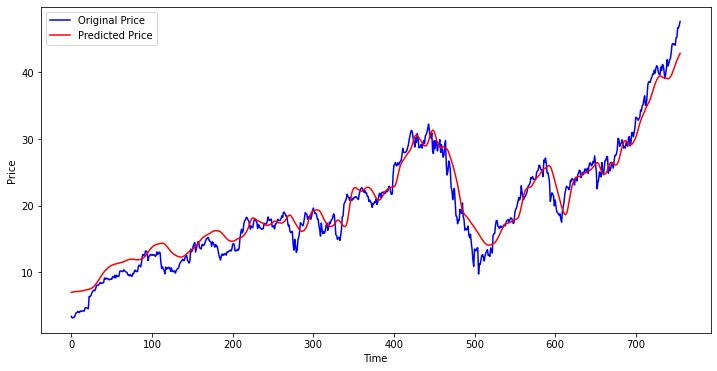

In [49]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'Original Price')
plt.plot(y_predicted, 'r' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()